# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN" April 2023

# **Beginner Level Task**

# **Task - 3 Music Recommendation System**

Music recommender systems can suggest songs to users based on their listening patterns

# **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Reading the dataset**

In [ ]:
songs_data = pd.read_csv("/content/songs.csv")
songs_extra_info =  pd.read_csv("/content/song_extra_info.csv")
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
members_data = pd.read_csv("/content/members.csv")
sample_submission_data = pd.read_csv("/content/sample_submission.csv")

# **Displaying all the datasets**

In [ ]:
songs_data

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
340802,pZr8GahGo+qSnJNQ8RtH9wz6RRTSihQv1lBCFR+F3wo=,111270,921,John Debney,John Debney,NaN,52.0
340803,oVNH3af4v9Hll+6qznesgK1ZYNA4hRjJerwqiJtft7Y=,206216,921,The Lone Ranger: Wanted,Pete Molinari,NaN,52.0
340804,mXw9RIAdGoGYGqSyJ3n3wXxqIi6Q5YJqD2xDaD/iIZg=,194246,465,Jewel,NaN,NaN,52.0
340805,HqLGB8+b2rqSbEmdJoMcXMJFZzyodIbcBL7B9+iK6YU=,252168,NaN,Aly & Fila| Standerwick & Bjorn Akesson,D. Stone,NaN,52.0


In [ ]:
songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
541001,hIwDFaX0YUGZAhKr4mq+ziW+9bDsX94kWub83ZVpWL8=,Feel,DEZ651359572
541002,95YtNeGto+m987ws0EjQaq8geK4habgtm+YgAaFER8c=,The Power of Love,USRDG0510715
541003,twlS6cvW8XiTclFZuuuhDFg8DjWqUv3W4oes3u61pTI=,La Aurora,ITB009600577
541004,W/ZJHKgllnnprFcEi3NMpKgv8V3RdOx/k/j5XpZaP7g=,Deep,TCABN1399406


In [ ]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
164210,RJ7NcOzGm1hQfnkrpO/x3Mfefts8naQA58es3BalkRs=,rqNd52MxQ+okfR61j2c7u36DLODO4d2Zt/hMm3jxncM=,discover,Online playlist more,online-playlist,0.0
164211,RJ7NcOzGm1hQfnkrpO/x3Mfefts8naQA58es3BalkRs=,Vdr01RxFKIg+Ul+ytzIY4wqOkeAdz0yK9X2CfEqURTI=,discover,Online playlist more,online-playlist,0.0
164212,RJ7NcOzGm1hQfnkrpO/x3Mfefts8naQA58es3BalkRs=,6u8XFzFGxiBwI80y75xoA1tML8I6Q2/4ptr8OF/xWXY=,my library,NaN,top-hits-for-artist,1.0
164213,NE+jdORNBYCKR9xo+TNptpDx2TlRajNS46GuTpxPSCw=,7jGyTXKsCZRC53SvexoNFTY3LsSCMtDfl2jMB76NgP8=,my library,Local playlist more,local-library,1.0


In [ ]:
test_data

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
209028,209028,cwyJueBC2115jDABgUIs0v0t5W5hu4i4dnEgECWGPM0=,wWav1jIodIE1P/4xbHMD7J0qTlUlqrvTf8NXX/Ft4H8=,radio,Radio,radio
209029,209029,cwyJueBC2115jDABgUIs0v0t5W5hu4i4dnEgECWGPM0=,qET1d64Au26Q9V77S9svL+OJav9XyyvtCbWjIheMyzs=,radio,Radio,radio
209030,209030,cwyJueBC2115jDABgUIs0v0t5W5hu4i4dnEgECWGPM0=,D9E1iSrZao6Qdp2R1qGLIboW3N24l63eesoe9OnfFoc=,radio,Radio,radio
209031,209031,jL7ukei/Kb4gDCfTG4+VhV4TzLaDecjji/aW+GqWvac=,osomQ3bUl85P/JwuMcnixiQz1kuNgvsRvvs6IiD89aw=,my library,Local playlist more,local-library


In [ ]:
members_data

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [ ]:
sample_submission_data

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
2556785,2556785,0.5
2556786,2556786,0.5
2556787,2556787,0.5
2556788,2556788,0.5


# **Displaying the shape**

In [ ]:
songs_data.shape

(340807, 7)

In [ ]:
songs_extra_info.shape

(541006, 3)

In [ ]:
train_data.shape

(164215, 6)

In [ ]:
test_data.shape

(209033, 6)

In [ ]:
members_data.shape

(34403, 7)

In [ ]:
sample_submission_data.shape

(2556790, 2)

# **EDA on Songs dataset**

In [ ]:
print("Columns present in the songs_data are:")
for columns in songs_data.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [ ]:
print("Columns present in the songs_data are:")
for columns in songs_data.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [ ]:
print(f"Number of records : {songs_data.shape[0]}")
print(f"Count of distinct song lengths : {len(songs_data.song_length.unique())}")
print(f"Count of distinct genre ids : {len(songs_data.genre_ids.unique())}")
print(f"Count of distinct artist name : {len(songs_data.artist_name.unique())}")
print(f"Count of distinct composer : {len(songs_data.composer.unique())}")
print(f"Count of distinct lyricist : {len(songs_data.lyricist.unique())}")
print(f"Count of distinct languages : {len(songs_data.language.unique())}")

Number of records : 340807
Count of distinct song lengths : 59223
Count of distinct genre ids : 633
Count of distinct artist name : 49767
Count of distinct composer : 79202
Count of distinct lyricist : 33127
Count of distinct languages : 11


In [ ]:
songs_data.describe()

,song_length,language
count,3.408070e+05,340806.000000
mean,2.477147e+05,28.611585
std,1.442607e+05,23.729854
min,1.253000e+03,-1.000000
25%,1.956040e+05,3.000000
50%,2.321010e+05,31.000000
75%,2.745060e+05,52.000000
max,9.146340e+06,59.000000


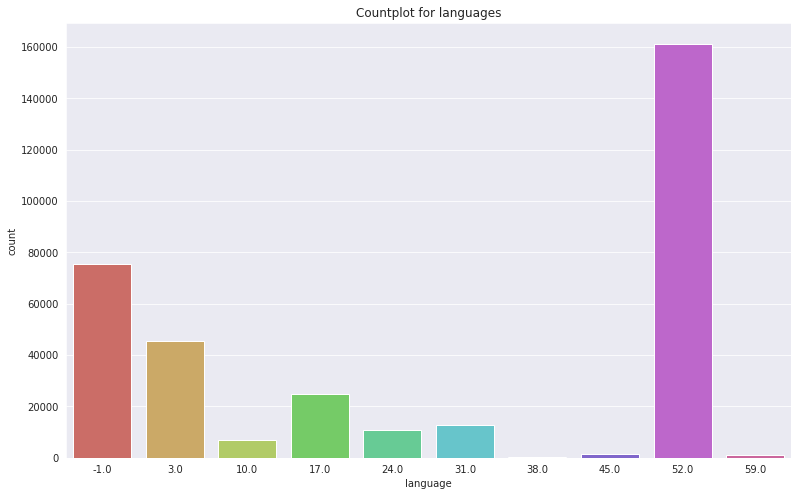

In [ ]:
plt.figure(figsize = (13, 8))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs_data.language, data = songs_data.language,palette="hls",)
ax.set_title("Countplot for languages")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


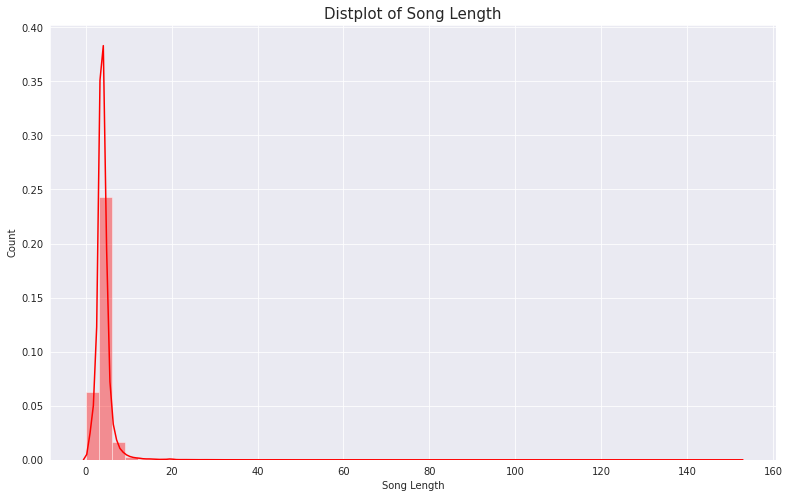

In [ ]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
ax = sns.distplot(songs_data.song_length/60000, color='r')
ax.set_title('Distplot of Song Length', fontsize=15)
ax.set(xlabel='Song Length', ylabel='Count')
plt.show()

In [ ]:
songs_data.isnull().sum()

song_id             0
song_length         0
genre_ids        8434
artist_name         0
composer       148620
lyricist       261922
language            1
dtype: int64

In [ ]:
songs_data.genre_ids.value_counts()

465              118106
1609              22372
2022              21399
958               18412
2122              14150
                  ...  
1180|2022             1
242|786|947           1
2122|275|1572         1
317|677               1
726|139               1
Name: genre_ids, Length: 632, dtype: int64

In [ ]:
songs_data['genre_ids'].fillna('465',inplace=True)

In [ ]:
songs_data['language'].value_counts()

 52.0    161293
-1.0      75428
 3.0      45549
 17.0     24849
 31.0     12841
 24.0     10918
 10.0      6948
 45.0      1490
 59.0      1279
 38.0       211
Name: language, dtype: int64

In [ ]:
songs_data['language'].fillna(52.0,inplace=True)

In [ ]:
songs_data.drop(['composer'], axis =1, inplace=True)
songs_data.drop(['lyricist'], axis =1, inplace=True)

In [ ]:
songs_data.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

In [ ]:
songs_data

,song_id,song_length,genre_ids,artist_name,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,52.0
...,...,...,...,...,...
340802,pZr8GahGo+qSnJNQ8RtH9wz6RRTSihQv1lBCFR+F3wo=,111270,921,John Debney,52.0
340803,oVNH3af4v9Hll+6qznesgK1ZYNA4hRjJerwqiJtft7Y=,206216,921,The Lone Ranger: Wanted,52.0
340804,mXw9RIAdGoGYGqSyJ3n3wXxqIi6Q5YJqD2xDaD/iIZg=,194246,465,Jewel,52.0
340805,HqLGB8+b2rqSbEmdJoMcXMJFZzyodIbcBL7B9+iK6YU=,252168,465,Aly & Fila| Standerwick & Bjorn Akesson,52.0


# **EDA on songs_extra_info dataset**

In [ ]:
print("Columns present in the songs_extra_info are:")
for columns in songs_extra_info.columns:
    print(columns)

Columns present in the songs_extra_info are:
song_id
name
isrc


In [ ]:
songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
songs_extra_info.isnull().sum()

song_id        0
name           2
isrc       55681
dtype: int64

In [ ]:
songs_extra_info.drop('isrc', axis = 1, inplace = True)

# **EDA on member dataset**

In [ ]:
print("Columns present in the members_data are:")
for columns in members_data.columns:
    print(columns)

Columns present in the members_data are:
msno
city
bd
gender
registered_via
registration_init_time
expiration_date


In [ ]:
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for gender')

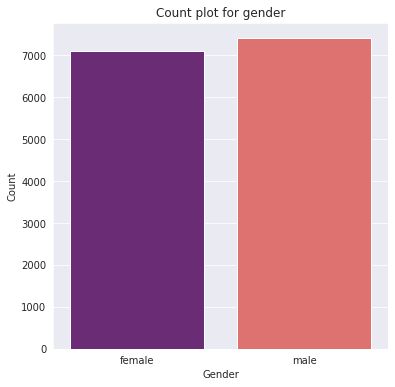

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(members_data['gender'], data=members_data, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for gender')

In [ ]:
members_data.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [ ]:
members_data.fillna('male', inplace = True)

In [ ]:
members_data.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for Registation Method')

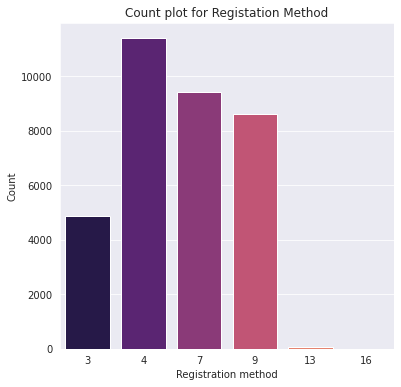

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(members_data['registered_via'], data=members_data, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for Registation Method')

# **EDA on Training set**

In [ ]:
print(f"Total number of records : {train_data.shape[0]}")

Total number of records : 164215


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for system tab there are using')

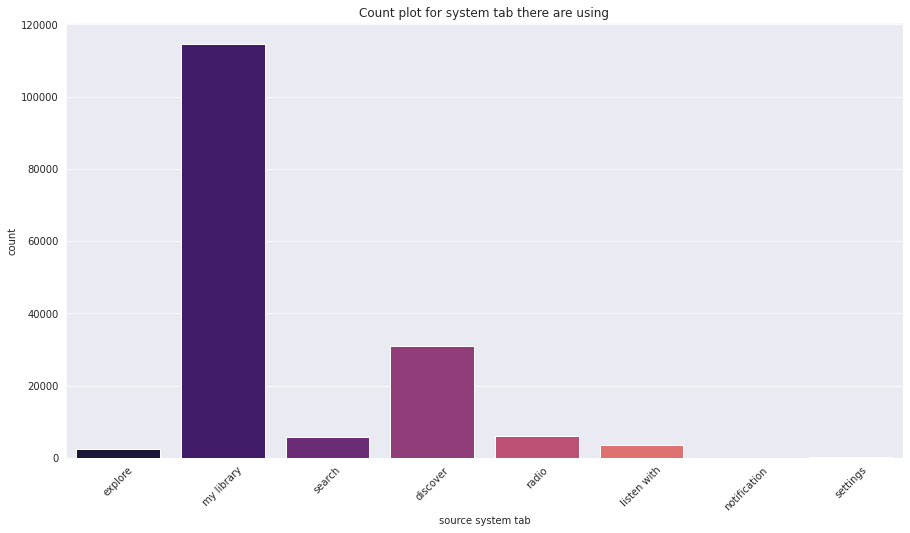

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(train_data['source_system_tab'],data=train_data, palette = 'magma')
plt.xlabel('source system tab')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using')

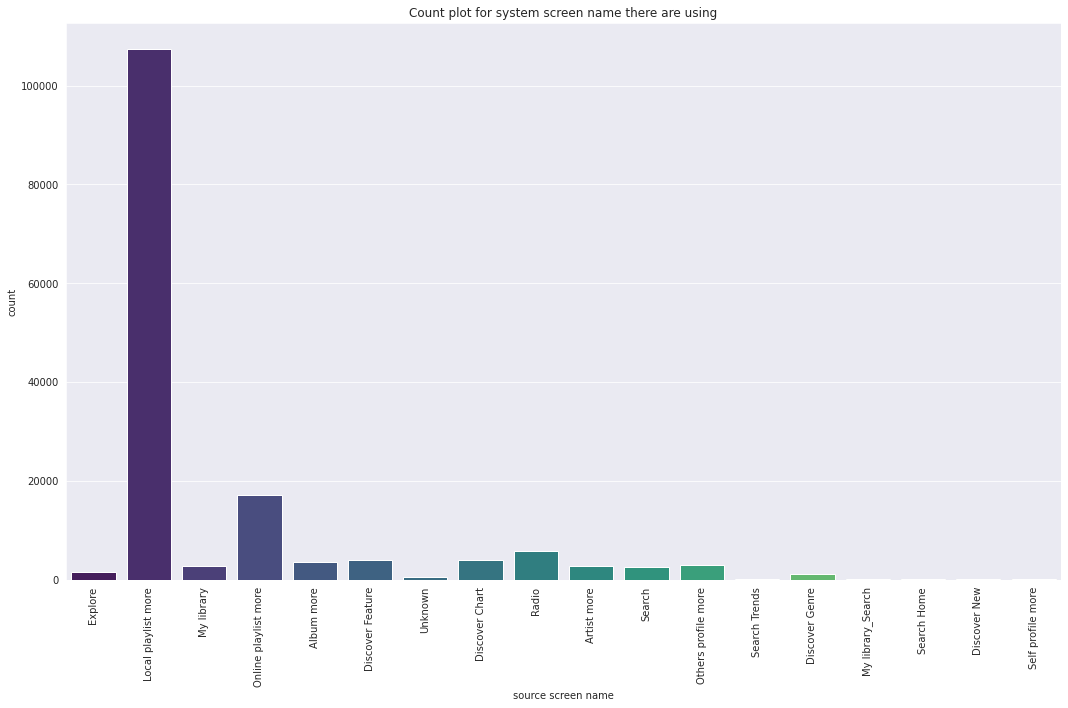

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_data['source_screen_name'],data=train_data, palette = 'viridis')
sns.set(style="darkgrid")
plt.xlabel('source screen name')
plt.ylabel('count')
plt.xticks(rotation='90')
plt.title('Count plot for system screen name there are using')
plt.tight_layout()

In [ ]:
print("Total percentage for NaN value in target column  : ",(train_data["target"].isna().sum()/len(train_data["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.0006089577687787351 %


In [ ]:
duplicate_values = len(train_data["msno"])-train_data["msno"].nunique()
print("Total no of duplicate user id         : ",duplicate_values)
print("Total percentage of duplicate user id : ",(duplicate_values/len(train_data["msno"]))*100,"%")

Total no of duplicate user id         :  155552
Total percentage of duplicate user id :  94.72459884906982 %


In [ ]:
duplicate_values1 = len(train_data["song_id"])-train_data["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train_data["song_id"]))*100,"%")

Total no of duplicate song id         :  124811
Total percentage of duplicate song id :  76.00462807904272 %


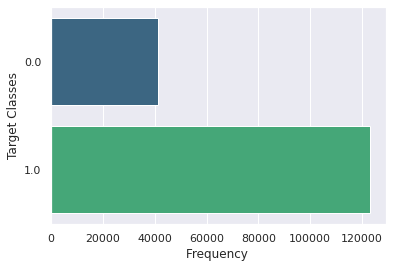

In [ ]:
sns.countplot(y=train_data['target'],data=train_data, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

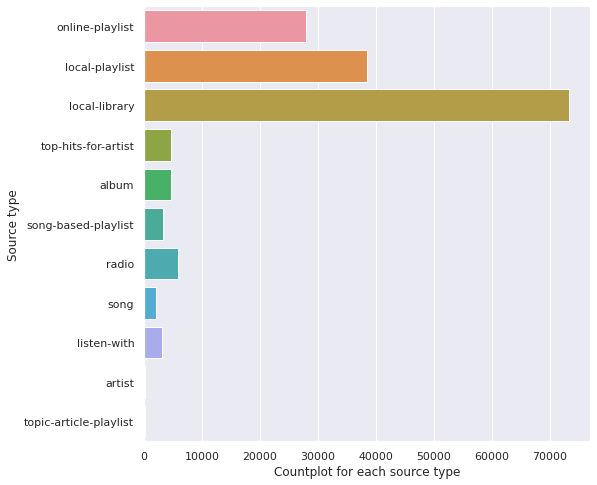

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(y=train_data['source_type'],data=train_data)
plt.ylabel('Source type')
plt.xlabel('Countplot for each source type')
plt.show()

In [ ]:
train_data.isnull().sum()

msno                     0
song_id                  1
source_system_tab      472
source_screen_name    7480
source_type            274
target                   1
dtype: int64

In [ ]:
train_data['source_system_tab'].fillna('my library',inplace=True)
train_data['source_type'].fillna('local-library',inplace=True)
train_data['source_screen_name'].fillna('Local playlist',inplace=True)

In [ ]:
train_data.isnull().sum()

msno                  0
song_id               1
source_system_tab     0
source_screen_name    0
source_type           0
target                1
dtype: int64

In [ ]:
train_data.isnull().sum()

msno                  0
song_id               1
source_system_tab     0
source_screen_name    0
source_type           0
target                1
dtype: int64

# **Information about the Test Dataset and Sample Submission Dataset**

In [ ]:
print("Columns present in the test_data are:")
for columns in test_data.columns:
    print(columns)

Columns present in the test_data are:
id
msno
song_id
source_system_tab
source_screen_name
source_type


In [ ]:
print("Columns present in the sample_submission_data are:")
for columns in sample_submission_data.columns:
    print(columns)

Columns present in the sample_submission_data are:
id
target


# **Merging the datasets**

In [ ]:
merged_songs = pd.merge(songs_data, songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(train_data, members_data, on ='msno' ,how='left')
train_data = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164215 entries, 0 to 164214
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    164215 non-null  object 
 1   song_id                 164214 non-null  object 
 2   source_system_tab       164215 non-null  object 
 3   source_screen_name      164215 non-null  object 
 4   source_type             164215 non-null  object 
 5   target                  164214 non-null  float64
 6   city                    164214 non-null  float64
 7   bd                      164214 non-null  float64
 8   gender                  164214 non-null  object 
 9   registered_via          164214 non-null  float64
 10  registration_init_time  164214 non-null  float64
 11  expiration_date         164214 non-null  float64
 12  song_length             108556 non-null  float64
 13  genre_ids               108556 non-null  object 
 14  artist_name         

In [ ]:
train_data.drop(['msno'], axis = 1, inplace=True)
train_data.drop(['song_id'], axis = 1, inplace=True)

In [ ]:
df = train_data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(df['source_system_tab'])
source_screen_name = encoder.fit_transform(df['source_screen_name'])
source_type = encoder.fit_transform(df['source_type'])
gender	= encoder.fit_transform(df['gender'])
artist_name = encoder.fit_transform(df['artist_name'])
name = encoder.fit_transform(df['name'])
genre_ids = encoder.fit_transform(df['genre_ids'])

In [ ]:
df['source_system_tab'] = source_system_tab
df['source_screen_name'] = source_screen_name
df['source_type'] = source_type
df['gender'] = gender
df['artist_name'] = artist_name
df['name'] = name
df['genre_ids'] = genre_ids

In [ ]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,6,5,1.0,1.0,0.0,1,7.0,20120102.0,20171005.0,NaN,182,5195,NaN,16624
1,3,8,4,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,182,5195,NaN,16624
2,3,8,4,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,182,5195,NaN,16624
3,3,8,4,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,182,5195,NaN,16624
4,1,6,5,1.0,1.0,0.0,1,7.0,20120102.0,20171005.0,NaN,182,5195,NaN,16624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164210,0,11,5,0.0,13.0,33.0,1,9.0,20110226.0,20171014.0,222624.0,105,3628,3.0,16624
164211,0,11,5,0.0,13.0,33.0,1,9.0,20110226.0,20171014.0,NaN,182,5195,NaN,16624
164212,3,7,9,1.0,13.0,33.0,1,9.0,20110226.0,20171014.0,NaN,182,5195,NaN,16624
164213,3,8,3,1.0,13.0,22.0,0,9.0,20150512.0,20170913.0,NaN,182,5195,NaN,16624


In [ ]:
df.isnull().sum()

source_system_tab             0
source_screen_name            0
source_type                   0
target                        1
city                          1
bd                            1
gender                        0
registered_via                1
registration_init_time        1
expiration_date               1
song_length               55659
genre_ids                     0
artist_name                   0
language                  55659
name                          0
dtype: int64

In [ ]:
df.dropna(subset = ['genre_ids', 'song_length', 'language'], inplace = True)

In [ ]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
5,1,6,5,1.0,1.0,0.0,1,7.0,20120102.0,20171005.0,247803.0,26,873,52.0,16624
6,3,8,4,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,229982.0,108,331,31.0,16624
7,1,6,5,1.0,1.0,0.0,1,7.0,20120102.0,20171005.0,181115.0,0,3187,52.0,6498
10,3,8,3,1.0,15.0,26.0,1,9.0,20111107.0,20180304.0,223933.0,108,1898,52.0,7756
11,3,8,3,1.0,15.0,26.0,1,9.0,20111107.0,20180304.0,224597.0,108,3857,3.0,15681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164206,0,11,5,1.0,13.0,33.0,1,9.0,20110226.0,20171014.0,308349.0,108,5026,3.0,9249
164207,3,8,4,1.0,5.0,31.0,1,3.0,20141112.0,20171001.0,234579.0,108,5058,3.0,16624
164208,0,11,5,0.0,13.0,33.0,1,9.0,20110226.0,20171014.0,274285.0,108,4966,3.0,16624
164209,3,8,4,1.0,5.0,31.0,1,3.0,20141112.0,20171001.0,237679.0,26,4458,3.0,12526


In [ ]:
df.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64

In [ ]:
df.to_csv('preprocessed_data2.csv')

In [ ]:
df1 = df[0:30000]

# Model **Building**

In [ ]:
Y = df1.target
X = df1.drop('target', axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape

(22500, 14)

In [ ]:
X_test.shape

(7500, 14)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)



Model Evaluation
# **New Section**

In [ ]:
print ("Accuracy is :", accuracy_score(Y_test, pred)*100)
print ("\nConfusion matrix :\n",confusion_matrix(Y_test, pred))

Accuracy is : 81.90666666666667

Confusion matrix :
 [[ 725 1006]
 [ 351 5418]]


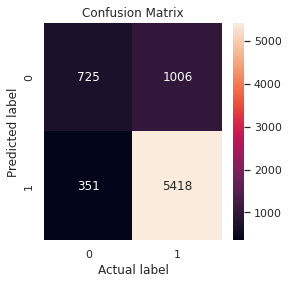

In [ ]:
plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True, fmt = 'g')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
pred_prob = rfc.predict_proba(X_test)

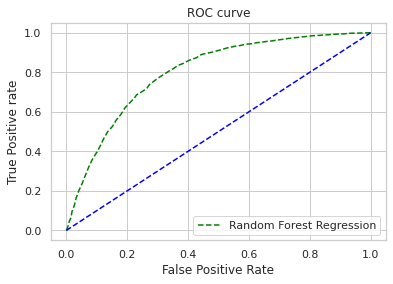

In [ ]:
sns.set_style('whitegrid')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='Random Forest Regression')
#plt.plot(thresh, linestyle='--', color='blue')
plt.plot([0, 1], ls="--", color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.savefig('ROC',dpi=300)
plt.show();

# **ThankYou!!!**